In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv', index_col='ID') # 훈련 데이터. 문제와 답으로 분리해야한다
X_test = pd.read_csv('data/test.csv', index_col='ID') # 테스트 문제 데이터

print(type(train))

display(train.head())
display(X_test.head()) # PRICE가 답이다

<class 'pandas.core.frame.DataFrame'>


,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ID,,,,,,,,,,,,,,,,,,,
0,9 Crumlin Way,Ridgewood,520000,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,37 Sissinghurst Crescent,Landsdale,575000,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,NaN
2,24 Tees Court,Mindarie,760000,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,31 Brentham Street,Mount Hawthorn,1230000,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,46/1 Corkhill Street,North Fremantle,2010000,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0


,ADDRESS,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ID,,,,,,,,,,,,,,,,,,
18510,29 Hartung Street,Mundaring,3,2,3.0,2199,159,1950.0,29600,Midland Station,15600,03-2019\r,6073,-31.899705,116.166117,MUNDARING CHRISTIAN COLLEGE,1.341198,NaN
18511,6 Kirkby Ridge,Salter Point,4,3,2.0,509,341,2001.0,8200,Canning Bridge Station,2000,08-2017\r,6152,-32.018620,115.858900,AQUINAS COLLEGE,0.882405,23.0
18512,45 Connelly Way,Booragoon,4,3,2.0,725,251,1982.0,10500,Bull Creek Station,2700,07-2018\r,6154,-32.042090,115.826290,APPLECROSS SENIOR HIGH SCHOOL,1.639635,34.0
18513,21 Torrenova Way,Sinagra,3,2,2.0,401,169,2009.0,24100,Joondalup Station,3500,05-2014\r,6065,-31.740480,115.804078,WANNEROO SECONDARY COLLEGE,2.199511,131.0
18514,4B Hilo Place,Warnbro,3,1,1.0,474,107,1993.0,43600,Warnbro Station,1100,03-2019\r,6169,-32.335790,115.765140,WARNBRO COMMUNITY HIGH SCHOOL,1.227092,NaN


In [3]:
y_train = train.pop('PRICE') # 훈련 답 데이터
y_train

ID
0         520000
1         575000
2         760000
3        1230000
4        2010000
          ...   
18505     475000
18506     485000
18507     642000
18508     491000
18509     490000
Name: PRICE, Length: 18510, dtype: int64

In [4]:
X_train = train # 훈련 문제 데이터
X_train.head()

,ADDRESS,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
ID,,,,,,,,,,,,,,,,,,
0,9 Crumlin Way,Ridgewood,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,37 Sissinghurst Crescent,Landsdale,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,NaN
2,24 Tees Court,Mindarie,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,31 Brentham Street,Mount Hawthorn,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,46/1 Corkhill Street,North Fremantle,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18510 entries, 0 to 18509
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           18510 non-null  object 
 1   SUBURB            18510 non-null  object 
 2   BEDROOMS          18510 non-null  int64  
 3   BATHROOMS         18510 non-null  int64  
 4   GARAGE            17143 non-null  float64
 5   LAND_AREA         18510 non-null  int64  
 6   FLOOR_AREA        18510 non-null  int64  
 7   BUILD_YEAR        16782 non-null  float64
 8   CBD_DIST          18510 non-null  int64  
 9   NEAREST_STN       18510 non-null  object 
 10  NEAREST_STN_DIST  18510 non-null  int64  
 11  DATE_SOLD         18510 non-null  object 
 12  POSTCODE          18510 non-null  int64  
 13  LATITUDE          18510 non-null  float64
 14  LONGITUDE         18510 non-null  float64
 15  NEAREST_SCH       18510 non-null  object 
 16  NEAREST_SCH_DIST  18510 non-null  float6

In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15146 entries, 18510 to 33655
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           15146 non-null  object 
 1   SUBURB            15146 non-null  object 
 2   BEDROOMS          15146 non-null  int64  
 3   BATHROOMS         15146 non-null  int64  
 4   GARAGE            14035 non-null  float64
 5   LAND_AREA         15146 non-null  int64  
 6   FLOOR_AREA        15146 non-null  int64  
 7   BUILD_YEAR        13719 non-null  float64
 8   CBD_DIST          15146 non-null  int64  
 9   NEAREST_STN       15146 non-null  object 
 10  NEAREST_STN_DIST  15146 non-null  int64  
 11  DATE_SOLD         15146 non-null  object 
 12  POSTCODE          15146 non-null  int64  
 13  LATITUDE          15146 non-null  float64
 14  LONGITUDE         15146 non-null  float64
 15  NEAREST_SCH       15146 non-null  object 
 16  NEAREST_SCH_DIST  15146 non-null  fl

In [7]:
X_train.isnull().sum()

ADDRESS                0
SUBURB                 0
BEDROOMS               0
BATHROOMS              0
GARAGE              1367
LAND_AREA              0
FLOOR_AREA             0
BUILD_YEAR          1728
CBD_DIST               0
NEAREST_STN            0
NEAREST_STN_DIST       0
DATE_SOLD              0
POSTCODE               0
LATITUDE               0
LONGITUDE              0
NEAREST_SCH            0
NEAREST_SCH_DIST       0
NEAREST_SCH_RANK    6000
dtype: int64

In [8]:
X_test.isnull().sum()

ADDRESS                0
SUBURB                 0
BEDROOMS               0
BATHROOMS              0
GARAGE              1111
LAND_AREA              0
FLOOR_AREA             0
BUILD_YEAR          1427
CBD_DIST               0
NEAREST_STN            0
NEAREST_STN_DIST       0
DATE_SOLD              0
POSTCODE               0
LATITUDE               0
LONGITUDE              0
NEAREST_SCH            0
NEAREST_SCH_DIST       0
NEAREST_SCH_RANK    4952
dtype: int64

In [9]:
t = X_train['GARAGE'].unique()

In [10]:
t.sort()
t

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 16., 17., 18., 20., 21., 26., 32., 99., nan])

# GARAGE null notnull
- LAND_AREA
    - null : 5524.179224579371
    - not null : 2614.700227498104
- 당최 이해가 안 간다
- 처음에는 null이 0 이라고 생각했다
- 그런데 null인 집의 땅이 두배 더 크다
- garage가 차고인데 땅이 더 큰 집에 차고가 없는 것은 이해가 가지 않는다

In [11]:
X_train[X_train['GARAGE'].isnull()]['LAND_AREA'].mean()

5524.179224579371

In [12]:
X_train[X_train['GARAGE'].notnull()]['LAND_AREA'].mean()

2614.700227498104

In [19]:
X_GL = X_train[X_train['GARAGE'].notnull()][['LAND_AREA','GARAGE']]
X_GL.sort_values('LAND_AREA', inplace=True)
X_GL

,LAND_AREA,GARAGE
ID,,
3118,61,1.0
15528,72,1.0
18279,76,1.0
14419,80,2.0
17908,84,1.0
...,...,...
6043,496919,4.0
12373,983690,2.0
14806,999999,2.0


Text(0, 0.5, 'GARAGE')

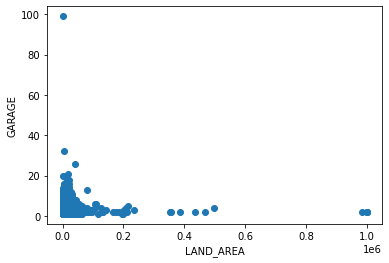

In [25]:
plt.scatter( X_GL['LAND_AREA'], X_GL['GARAGE'])
plt.xlabel('LAND_AREA')
plt.ylabel('GARAGE')

In [ ]:
pre = model.predict(X_train[['LSTAT']])

# 시각화
plt.scatter(X_train['LSTAT'], y_train) # 실제값
plt.scatter(X_train['LSTAT'], pre, c='r') # 예측값

plt.show()